In [1]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
sales = pd.read_csv('sales.csv')

<BarContainer object of 5383 artists>

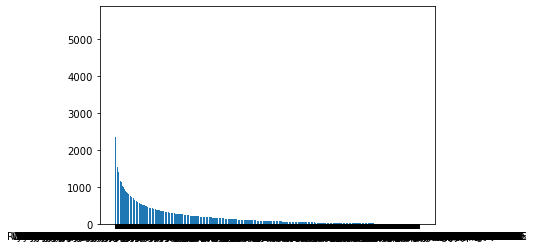

In [83]:
plt.bar(sales['Description'].value_counts().index, sales['Description'].value_counts())

In [ ]:
plt.bar(sales['Description'].value_counts().index, sales['Description'].value_counts())

In [70]:
lst = sales['StockCode'].value_counts()

In [79]:
lst.index

Index(['85123A', '85099B', '22423', '21212', '20725', '84879', '47566',
       '21232', '22383', '20727',
       ...
       '35822P', '21008', '20822', '21475', '84510b', '21585', '37451',
       '72751C', '84311', '23617'],
      dtype='object', length=4901)

In [33]:
sales = sales[sales['DayofWeek']!=5]

In [34]:
dailysales = sales.groupby(['Year', 'DayofYear'])['Sales'].sum()
weeklysales = sales.groupby(['Year', 'Week'])['Sales'].sum()
monthlysales = sales.groupby(['Year', 'Month'])['Sales'].sum()

In [49]:
len(weeklysales)

104

In [35]:
dailyorders = sales.groupby(['Year', 'DayofYear'])['Sales'].count()
weeklyorders = sales.groupby(['Year', 'Week'])['Sales'].count()
monthlyorders = sales.groupby(['Year', 'Month'])['Sales'].count()

In [7]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [47]:
dtrain, dtest = train_test_split(dailysales, train_size=365)

In [50]:
wtrain, wtest = train_test_split(weeklysales, train_size=52)

In [11]:
model = pm.auto_arima(train, seasonal=True, m=12)

In [16]:
from pmdarima.arima.stationarity import ADFTest

In [48]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(train) 

(0.042842777451775935, False)

In [39]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(weeklysales)  

(0.5537083150460174, True)

In [40]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(monthlysales)  

(0.10342813561989919, True)

In [41]:
adf_test.should_diff(monthlyorders)  

(0.11934772815318671, True)

In [42]:
adf_test.should_diff(weeklyorders)  

(0.7244014986123889, True)

In [43]:
adf_test.should_diff(dailyorders)  

(0.18690416777944874, True)

In [23]:
from pmdarima.utils import tsdisplay

C:\Users\Alex\anaconda3\envs\datasci\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


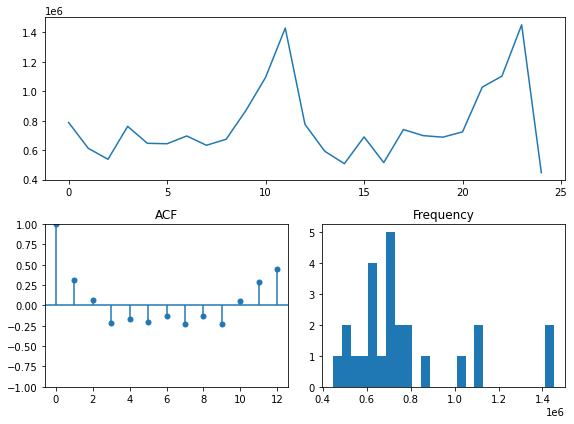

In [53]:
tsdisplay(monthlysales, lag_max=12)

C:\Users\Alex\anaconda3\envs\datasci\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


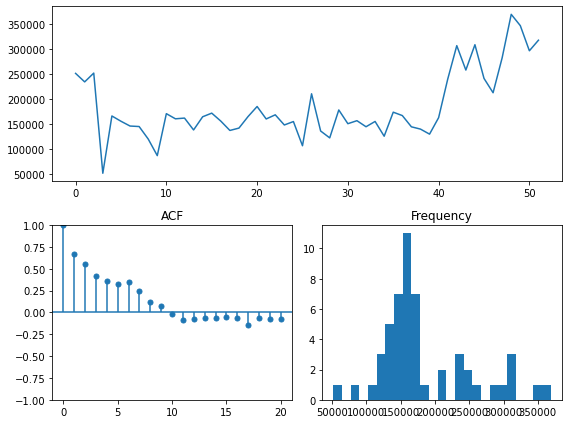

In [52]:
tsdisplay(wtrain, lag_max=20)

C:\Users\Alex\anaconda3\envs\datasci\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


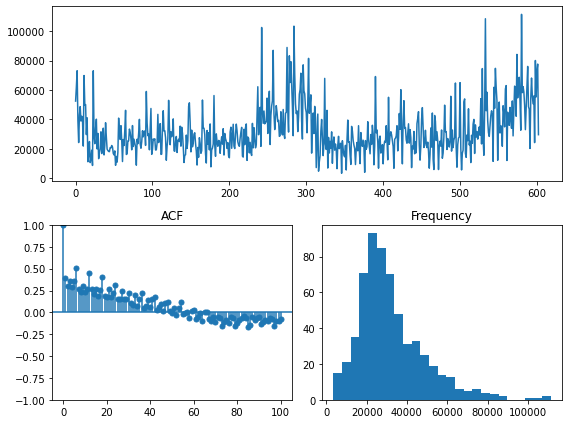

In [46]:
tsdisplay(dailysales, lag_max=100)